In [1]:
import numpy as np
import pandas as pd
from datetime import datetime, date
import os
import matplotlib.pyplot as plt

print(os.listdir("../input"))

['final-bought-dataset.csv']


In [2]:
bought_df = pd.read_csv('../input/final-bought-dataset.csv')
bought_df.head()

,session,item,total_time,avg.time_clicks,max_time,n_clicks,avg_pop_score,no_of_categories,item_time,dow_first,dow_last,item_clicks,duration_f_l,f_click,l_click,item_pop,purchased
0,11,214717089,784,65.33,385,12,0.157778,1,385,3,3,1,2,0,0,0.27,0
1,11,214743335,784,65.33,385,12,0.157778,1,43,3,3,1,2,0,0,0.07,0
2,11,214563337,784,65.33,385,12,0.157778,1,27,3,3,1,2,0,0,0.02,0
3,11,214819762,784,65.33,385,12,0.157778,1,20,3,3,1,2,0,1,0.13,0
4,11,214826837,784,65.33,385,12,0.157778,1,49,3,3,1,2,0,0,0.26,0


In [3]:
len(bought_df), len(bought_df[bought_df['purchased']==1]), len(bought_df[bought_df['purchased']==0])

(2314687, 1049817, 1264870)

In [4]:
df = pd.DataFrame(bought_df)

In [5]:
from sklearn.model_selection import train_test_split

X = df.drop(['purchased'], axis=1)
y = df[['purchased']]
X_train, X_test_val, y_train, y_test_val = train_test_split(X, y, test_size=0.30)
X_test, X_validate, y_test, y_validate  = train_test_split(X_test_val, y_test_val, test_size=0.50)
X_train.shape, X_validate.shape, X_test.shape, y_train.shape, y_validate.shape, y_test.shape

((1620280, 16),
 (347204, 16),
 (347203, 16),
 (1620280, 1),
 (347204, 1),
 (347203, 1))

In [6]:
## KNN
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=11)
model.fit(X_train, y_train.values.ravel())

y_pred = model.predict(X_validate)

In [7]:
from sklearn.metrics import roc_curve, auc, accuracy_score
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_true=y_validate, y_score=y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)

print("Validation set metrics:-")
print("roc_auc", roc_auc)
print("accuracy_score", accuracy_score(y_pred, y_validate))

Validation set metrics:-
roc_auc 0.6195367473295562
accuracy_score 0.6277635050287439


In [8]:
y_pred = model.predict(X_test)

Test data metrics:-


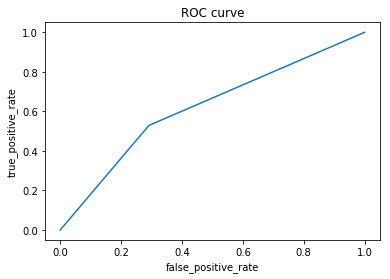

roc_auc 0.6187691013149763
accuracy_score 0.6273131280547691


In [9]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_true=y_test.values.ravel(), y_score=y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)

print("Test data metrics:-")
plt.title("ROC curve")
plt.xlabel("false_positive_rate")
plt.ylabel("true_positive_rate")
plt.plot(false_positive_rate,true_positive_rate)

plt.show() 
print("roc_auc", roc_auc)
print("accuracy_score", accuracy_score(y_pred, y_test))

In [10]:
y_pred = pd.DataFrame(y_pred, index=y_test.index, columns=['purchased'])
what_to_buy_df = pd.merge(X_test, y_pred, left_index=True, right_index=True)
what_to_buy_df.head(3)

,session,item,total_time,avg.time_clicks,max_time,n_clicks,avg_pop_score,no_of_categories,item_time,dow_first,dow_last,item_clicks,duration_f_l,f_click,l_click,item_pop,purchased
163602,827004,214587845,1276,75.06,488,17,0.208182,1,60,2,2,1,2,0,0,0.11,0
1143281,5837151,214845506,92,30.67,67,3,0.360000,3,25,2,2,1,2,0,0,0.18,1
1662642,8417683,214553426,3921,156.84,450,25,0.386667,2,172,0,0,1,2,0,0,0.18,0


In [11]:
unique_sid = what_to_buy_df['session'].unique()

fp = open("solution.dat","w")

for sid in unique_sid:
#     all_items = what_to_buy_df['session'==sid , 'item']
    bought_items = what_to_buy_df.loc[(what_to_buy_df['session']==sid) & (what_to_buy_df['purchased']==1), 'item'].values
    if len(bought_items)>0:
        items = ','.join(map(str, bought_items))
        print(f"{sid};{items}") 
        
        print(f"{sid};{','.join(map(str, bought_items))}", file=fp) 

        
fp.close()


5837151;214845506
9587437;214850085,214729460,214731071,214727015
3896699;214836795
1353564;214834877,214834880
2012201;214680369
9745841;214850792
561808;214821313
2634437;214829880,214829882
9837634;214853700
5944577;214848997
6269608;214849179,214510460
1411167;214551930
7782464;214651517,214829775
1784841;214684498
11212046;214510445
6795502;214837140,214828882,214507492
4633342;214829325
9263122;214850949
6126371;214705792
4532143;214828985
11322752;214858843,214858794
10688489;214567215
10462977;214854300,214839995
10951988;214845997
7649387;214851032,214853145
9963878;214844158
1465981;214829366,214829396
288758;214674680,214674675
8525351;214851131,214851750,214851579
2769656;214832364,214832462,214834946
4188674;214829042
6857932;214834880
1624187;214829722
789586;214829310
8836172;214832604
8430334;214844342
941834;214753515
5466843;214844345
3060308;214842877
5381386;214705361
10600858;214854300
6475984;214717507
2358542;214832563
120902;214826810
2226207;214826816
5071822;2

In [12]:
# A sample session id with what to buy and not buy
what_to_buy_df[what_to_buy_df['session']==11]

,session,item,total_time,avg.time_clicks,max_time,n_clicks,avg_pop_score,no_of_categories,item_time,dow_first,dow_last,item_clicks,duration_f_l,f_click,l_click,item_pop,purchased
4,11,214826837,784,65.33,385,12,0.157778,1,49,3,3,1,2,0,0,0.26,1
